# The Vector Space Model in a Nutshell
This tutorial presents some basics about the Vector Space Model by means of a very simple toy example. 

## Documents

|Doc|Title|Text|Length|
|---------------|
|d689|Love Henry|Get down, get down, Love Henry, ...|112|
|d671|Bob Dylan's Blues|Unlike most of the songs nowaday...|99|
|d1003|Living The Blues|Since you've been gone...|48|
|d858|Train Of Love|Train of love's a comin', big black wheels are...|118|
|d717|Slow Train Coming|Sometimes I feel so low-down...|2091|



## Document-word matrix

|    |blues|living|love|henry|train|girl|
|-----|:---:|:----:|:--:|:----:|:----:|:---:|
|d671 |0    |0     |2   |0     |0     |0   |
|d689 |0    |0     |5   |3     |0     |3   |
|d717 |0    |0     |2   |0     |7     |1   |
|d858 |0    |0     |4   |0     |6     |0   |
|d1003|3    |3     |0   |0     |0     |0   |


In [1]:
import numpy as np

docs_len = [('d671', 99), ('d689', 112), ('d717', 2091), ('d858', 118), ('d1003', 48)]
docs = [x[0] for x in docs_len]
words = ['blues', 'living', 'love', 'henry', 'train', 'girl']
M = np.array([[0,0,2,0,0,0],
     [0,0,5,3,0,3],
     [0,0,2,0,7,1],
     [0,0,4,0,6,0],
     [3,3,0,0,0,0]])


In [2]:
def weight(matrix, method=None, k=0.5):
    transformed = []
    for i in range(0, len(matrix)):
        if method == 'augmented':
            row = [k + (1-k)*float(x)/np.max(matrix[i]) 
                   for x in matrix[i]]
        elif method == 'log':
            row = [1 + np.log(1 + float(x)) for x in matrix[i]]
        elif method == 'logavg':
            row = [(1 + np.log(1 + float(x))) / 
                   (1 + np.log(1 + np.mean(matrix[i]))) for x in matrix[i]]
        else:
            row = [x for x in matrix[i]]
        transformed.append(row)
    return np.array(transformed)

In [3]:
def idf(j, matrix, method=None):
    nt = len([x for x in matrix.T[j] if x > 0])
    idf = np.log(float(len(matrix) + 1) / (1 + nt))
    if method == 'max':
        nt1 = max([len(x) for x in matrix.T ])
        idf = np.log(float(nt1) / (1 + nt))
    elif method == 'prob':
        idf = np.log(1 + ((float(len(matrix))-nt) / nt))
    return idf

In [4]:
TF = weight(M, method=None)
IDF = np.array([idf(x, M, method='prob') for x in range(0, len(M.T))])
tf_idf = TF*IDF

## Spatial representation of documents
The vector space model provides a natural way for representing documents in the multi-dimensional space of tokens.

[[ 0.4462871   0.        ]
 [ 1.11571776  2.7488722 ]
 [ 0.4462871   0.91629073]
 [ 0.89257421  0.        ]
 [ 0.          0.        ]]


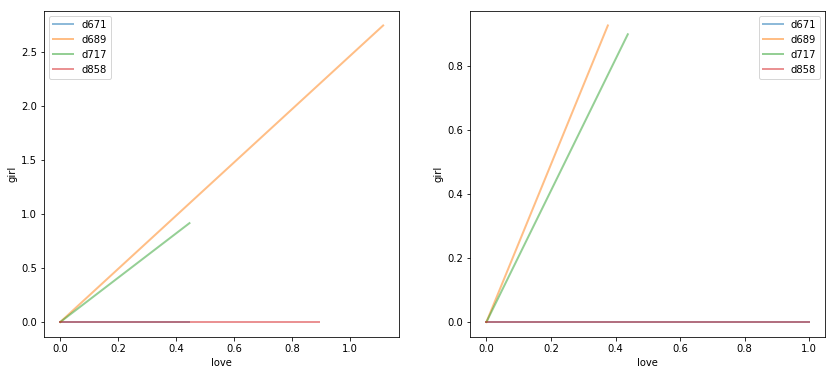

In [5]:
import matplotlib.pyplot as plt

w1, w2 = 'love', 'girl'
d1, d2 = words.index(w1), words.index(w2)
sub_space = tf_idf[:,[d1,d2]]

norms = np.array([np.linalg.norm(x) for x in sub_space])
norm_space = np.array([v / norms[i] 
                       for i, v in enumerate(sub_space)
                      if norms[i].sum() > 0])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
for i, d in enumerate(docs):
    if sub_space[i].sum() > 0:
        axes[0].plot([0, sub_space[i][0]], [0, sub_space[i][1]], 
                     linewidth=2, label=d, alpha=0.5)
        axes[1].plot([0, norm_space[i][0]], [0, norm_space[i][1]], 
                     linewidth=2, label=d, alpha=0.5)

axes[0].set_ylabel(w2)
axes[0].set_xlabel(w1)
axes[1].set_ylabel(w2)
axes[1].set_xlabel(w1)
axes[0].legend()
axes[1].legend()
plt.show()



## Evaluate similarity
The spatial representation of documents can be used for interpreting document similarity as a function of distance among document vectors.

Several vector distance metrics are available:

<table style="width: 100%">
<thead>
<tr>
<th style="width: 10%;">Metric</th>
<th style="text-align: center; width=60%;">Formula</th>
<th style="text-align: center; width=10%;">sim(d717, d858)</th>
<th style="width: 20%;">Interpretation</th>
</tr>
<thead>
<tbody>
<tr>
<td>
Cosine Distance
</td>
<td style="text-align: center;">
$1 - \frac{\sum\limits_{i=1}^{n} a_i b_i}{\sqrt{\sum\limits_{i=1}^{n}a_{1}^{2}}\sqrt{\sum\limits_{i=1}^{n}b_{1}^{2}}}$
</td>
<td style="text-align: center;">
0.0141
</td>
<td>
Cosine of the angle between the vectors
</td>
</tr>

<tr>
<td>
Euclidean Distance
</td>
<td style="text-align: center;">
$\sqrt{\sum\limits_{i=1}^{n}\mid a_i - b_i\mid^2}$
</td>
<td style="text-align: center;">
1.3705
</td>
<td>
Vector points distance
</td>
</tr>

<tr>
<td>
Chebyshev distance
</td>
<td style="text-align: center;">
$\max\limits_{i=1}^{n}(\mid a_i - b_i \mid)$
</td>
<td style="text-align: center;">
0.9162
</td>
<td>
The greatest different along any dimension
</td>
</tr>

<tr>
<td>
Manhattan distance
</td>
<td style="text-align: center;">
$\sum\limits_{i=1}^{n}\mid a_i - b_i \mid$
</td>
<td style="text-align: center;">
2.2788
</td>
<td>
Distance in a grid
</td>
</tr>

<tr>
<td>
Canberra distance
</td>
<td style="text-align: center;">
$\sum\limits_{i=1}^{n}\frac{\mid a_i - b_i \mid}{\mid a_i \mid \mid b_i \mid}$
</td>
<td style="text-align: center;">
1.4102
</td>
<td>
Normalized version of Manhattan distance
</td>
</tr>

<tr>
<td>
Bray-Curtis distance
</td>
<td style="text-align: center;">
$
\frac{\sum\limits_{i=1}^{n}\mid a_i - b_i \mid}
{\sum\limits_{i=1}^{n}\mid a_i + b_i \mid}
$
</td>
<td style="text-align: center;">
0.1608
</td>
<td>
Variant of Manhattan distance
</td>
</tr>

<tr>
<td>
Correlation distance
</td>
<td style="text-align: center;">
$
1 - 
\frac{\sum\limits_{i=1}^{n} (a_i - avg\ a)(b_i - avg\ b) }
{\sqrt{\left| \sum\limits_{i=1}^{n} (a_i - avg\ a)\right|^2}
\sqrt{\left| \sum\limits_{i=1}^{n} (b_i - avg\ b)\right|^2}}
$
</td>
<td style="text-align: center;">
0.0179
</td>
<td>
Equivalent to Cosine Distance of vectors shifted by their means
</td>
</tr>

<tr>
<td>
Minkowski distance
</td>
<td style="text-align: center;">
$
\left(\sum\limits_{i=1}^{n} \mid a_i - b_i \mid^p\right)^{\frac{1}{p}}
$
</td>
<td style="text-align: center;">
p=4 -> 1.0972
</td>
<td>
Generalization of Manhattan (p=1) and Euclidean (p=2) distances
</td>
</tr>


</tbody>
</table>

Note that:

$
\lim\limits_{p\rightarrow\infty}
\left(\sum\limits_{i=1}^{n} \mid a_i - b_i \mid^p\right)^{\frac{1}{p}}
= \max\limits_{i=1}^{n} \mid a_i - b_i \mid
$

and 

$
\lim\limits_{p\rightarrow - \infty}
\left(\sum\limits_{i=1}^{n} \mid a_i - b_i \mid^p\right)^{\frac{1}{p}}
= \min\limits_{i=1}^{n} \mid a_i - b_i \mid
$

In [76]:
from scipy.spatial import distance as ds


d1 = tf_idf[docs.index('d717')]
d2 = tf_idf[docs.index('d858')]

print 'cosine', ds.cosine(d1, d2)
print 'euclidean', ds.euclidean(d1, d2)
print 'chebyshev', ds.chebyshev(d1, d2)
print 'manhattan', ds.cityblock(d1, d2)
print 'canberra', ds.canberra(d1, d2)
print 'bray-curtis', ds.braycurtis(d1, d2)
print 'correlation', ds.correlation(d1, d2)
print 'minkowski', ds.minkowski(d1, d2, 4)

cosine 0.0141424208089
euclidean 1.37052894483
chebyshev 0.916290731874
manhattan 2.27886856638
canberra 1.41025641026
bray-curtis 0.160858302849
correlation 0.0179969292043
correlation 0.0179969292043
minkowski 1.09724510466


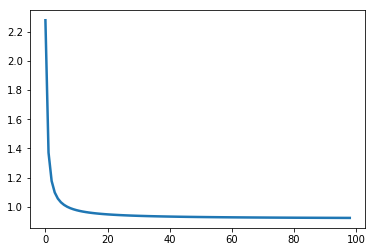

In [72]:
import matplotlib.pyplot as plt

y = []
for p in range(1, 100):
    y.append(ds.minkowski(d1, d2, p))

plt.plot(y, linewidth=2.5)
plt.show()